## Relax take home challenge

### Defining an "adopted user" as a user who has logged into the product on three separate days in at least one sevenday period , identify which factors predict future user adoption .

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
df_users = pd.read_csv("takehome_users.csv", parse_dates=True, encoding = "iso-8859-1")
df_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [24]:
df_engagements = pd.read_csv("takehome_user_engagement.csv", parse_dates=True, index_col=0)
df_engagements.head()

,user_id,visited
time_stamp,,
2014-04-22 03:53:30,1,1
2013-11-15 03:45:04,2,1
2013-11-29 03:45:04,2,1
2013-12-09 03:45:04,2,1
2013-12-25 03:45:04,2,1


In [25]:
# setup the number of visits 7day period
df_engagements_in_weeks = df_engagements.groupby(['user_id', pd.Grouper(freq='7D')]).size()
df_engagements_in_weeks = df_engagements_in_weeks.reset_index()

In [26]:
#filtering users who had >= 3 visits
df_adopted = df_engagements_in_weeks[df_engagements_in_weeks[0] >= 3]
df_adopted.drop(columns=['time_stamp', 0], inplace=True)
df_adopted = df_adopted.drop_duplicates()
df_adopted['adopted'] = 1

C:\SAnaconda\NewfolderForAnaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [35]:
print("\nPercentage of users adopted: {}%\n".format(round(len(df_adopted)/len(df_users)*100), 2))


Percentage of users adopted: 12%



In [28]:
df_users_merged = df_users.merge(df_adopted, left_on="object_id", right_on="user_id", how="outer")
df_users_merged['adopted'] = df_users_merged['adopted'].fillna(0)
df_users_merged['adopted'] = df_users_merged['adopted'].astype(int)
df_users_merged.drop(columns=['user_id'], inplace=True) #Not needed

df_users_merged.invited_by_user_id = df_users_merged.invited_by_user_id.fillna(0) # changing the null values to 0 assuming there is no user with user_id 0
print(df_users_merged.head())


   object_id        creation_time               name  \
0          1  2014-04-22 03:53:30     Clausen August   
1          2  2013-11-15 03:45:04      Poole Matthew   
2          3  2013-03-19 23:14:52  Bottrill Mitchell   
3          4  2013-05-21 08:09:28    Clausen Nicklas   
4          5  2013-01-17 10:14:20          Raw Grace   

                        email creation_source  last_session_creation_time  \
0    AugustCClausen@yahoo.com    GUEST_INVITE                1.398139e+09   
1      MatthewPoole@gustr.com      ORG_INVITE                1.396238e+09   
2  MitchellBottrill@gustr.com      ORG_INVITE                1.363735e+09   
3   NicklasSClausen@yahoo.com    GUEST_INVITE                1.369210e+09   
4          GraceRaw@yahoo.com    GUEST_INVITE                1.358850e+09   

   opted_in_to_mailing_list  enabled_for_marketing_drip  org_id  \
0                         1                           0      11   
1                         0                           0       1   

In [29]:
def print_percentage(ax, df):
    for rec, label_0, label_1 in zip(ax.patches, df[0], df[1]):
        height = rec.get_height()
    #print(height)
        ax.text(rec.get_x() + rec.get_width() / 2, 100, str(round((label_0/(label_0+label_1))*100, 2))+'%', 
               ha = 'center', va='bottom')
        ax.text(rec.get_x() + rec.get_width() / 2, height + 100, str(round((label_1/(label_0+label_1))*100, 2))+'%', 
               ha = 'center', va='bottom')


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

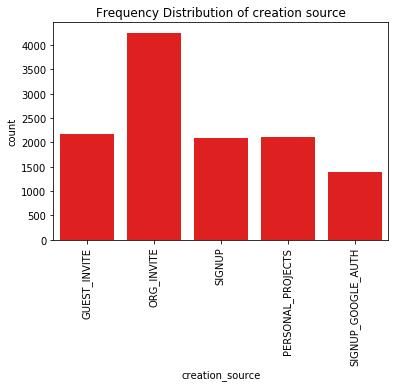

In [30]:
# Distribution of creation source
ax = sns.countplot(x=df_users_merged.creation_source, data=df_users_merged, color="r");
rects = ax.patches
plt.title('Frequency Distribution of creation source')
plt.xticks(rotation=90)


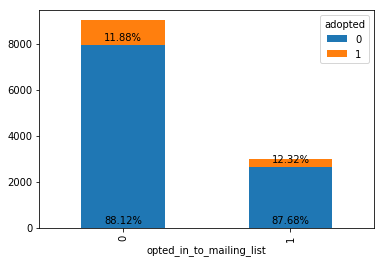

In [31]:
# relationship between features opted_in_to_mailing_list and adopted
df_maillist = pd.crosstab(index=df_users_merged["opted_in_to_mailing_list"], columns=df_users_merged["adopted"])
ax = df_maillist.plot(kind='bar', stacked=True)
print_percentage(ax, df_maillist)

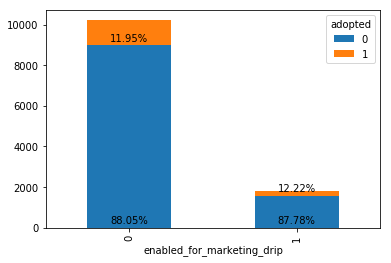

In [32]:
# relationship between features enabled_for_marketing_drip and adopted
df_mktglist = pd.crosstab(index=df_users_merged["enabled_for_marketing_drip"], columns=df_users_merged["adopted"])
ax = df_mktglist.plot(kind='bar', stacked=True)
print_percentage(ax, df_mktglist)

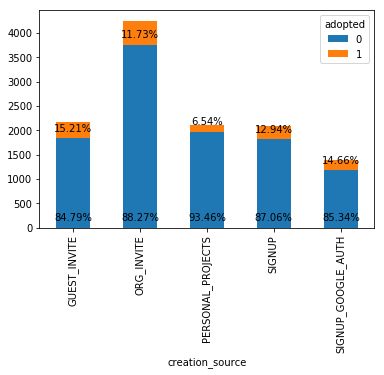

In [33]:
# relationship between features creation_source and adopted
df_creationsrc = pd.crosstab(index=df_users_merged["creation_source"], columns=df_users_merged["adopted"])
ax = df_creationsrc.plot(kind='bar', stacked=True)
print_percentage(ax, df_creationsrc)


####  From the exploratory data analysis, the important features for prediction of adopted user are opted_in_to_mailing_list, enabled_for_marketing_drip, creation_source.
#### The users who are in the mailing list are logged(adopted) into the system/product more than the ones who are not in the mailing list
#### More percentage of users who are marked for marketing drips, meaning marked for marketing emails/mails are adopted than the ones who are not marked for marketing drips
#### Even though most of the users are created through organizational invite, most users adopted are created thruough guest invite and through google signup.

#### Feature importance can be obtained through the chosen model for further analysis